# Предсказание ротамеров угла $\chi_1$ в зависимости от окружения

Дедлайн 4 декабря

In [1]:
import json
import pandas as pd
import numpy as np

## Запустите следующую клетку. Будет случайно выбрана аминокислота, для которой вы будете проводить исследование

In [193]:
amacid_names = ['ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'HIS', 'ILE', 'LEU',
                'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

In [233]:
print(f"Моя аминокислота - {np.random.choice(amacid_names)}")

Моя аминокислота - ILE


## Загрузите <a href="https://yadi.sk/d/FeLl5KYfjbhHgA?w=1">отсюда</a> соответствующий файл. Далее мы будем работать с ним.

# Часть 1. Анализ значений угла $\chi_1$

## Задание 1.1. Откроем загруженный файл. Посмотрим на колонки:

In [3]:
!pwd

/Users/mac-julia/Documents/proteins_hse


In [4]:
!ls

HW_3_smollkina_side-chains_task-Copy1.ipynb
HW_3_smollkina_side-chains_task.ipynb
Lectures
__pycache__
docking-potential-design.ipynb
geometry.py
lennard-jones_12-6.csv
obsolete
side-chain data
side-chain data.zip
side-chain data.zip.download
side-chains_task.ipynb
z8


In [5]:
#dpath = "/Users/andreyignatov/Downloads/SER_data.csv" 
dpath =  "/Users/mac-julia/Documents/proteins_hse/side-chain data/ILE_data.csv"

In [6]:
df = pd.read_csv(dpath)

In [7]:
df.head()

,Unnamed: 0,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,...,149.497815,41.249609,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189
1,1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,...,70.701617,40.707637,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747
2,2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,...,53.288917,14.692650,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501
3,3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,...,143.678835,109.953109,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228
4,4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,...,82.929903,96.622779,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644


In [8]:
df_copy = df.copy()

Эта таблица содержит информацию о сэмплах одной аминокислоты. Для каждого сэмпла известны:
- Значения всех двугранных углов $\chi$;
- Значения $\phi, \psi, \alpha$ (двугранный угол, построенный по 4 последовательным атомам $C_\alpha$);
- Данные о 17 ближайших пространственных соседях:
    - $\phi, \psi$;
    - Названия аминокислот;
    - Расстояние до целевой аминокислоты по $C_\alpha$;
    - Химические / физикохимические характеристики соседа: группы и точные значения некоторых характеристик;
    - Дополнительные геометрические характеристики (относительно целевой аминокислоты).

## Задание 1.2. Постройте гистограмму значений $\chi_1$ из этой таблицы. Какие ротамеры выделяются на этой гистограмме?

In [9]:
import matplotlib.pyplot as plt


Bad key text.latex.preview in file /Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is s

In [10]:
df = df[~np.isnan(df["chi_1"])]

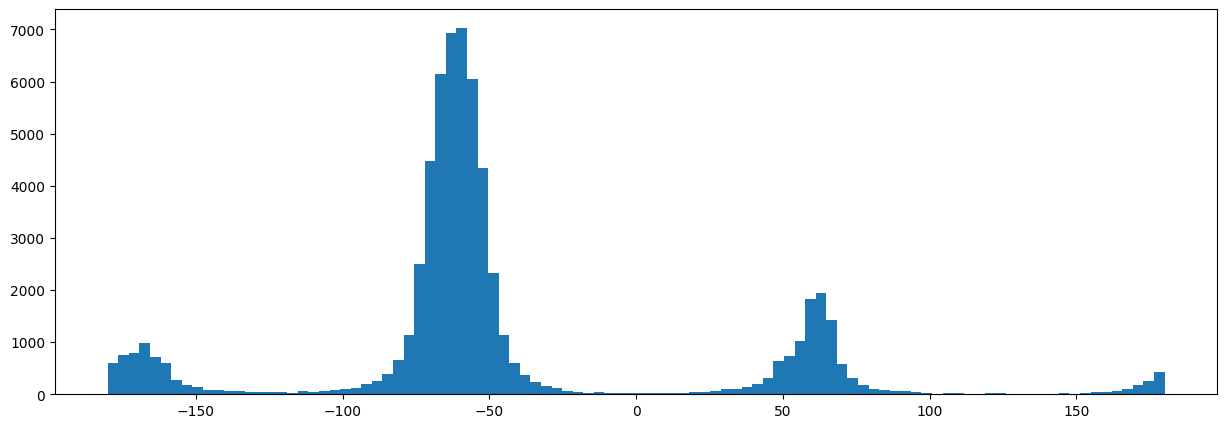

In [11]:
plt.figure(figsize=(15,5))
plt.hist(df["chi_1"], bins=100)
plt.show()

Занесите обнаруженные ротамеры в список rotamers:

In [12]:
rotamers = np.array([60, -60, 170])

## Задание 1.3. Давайте разберемся, как можно дискретизировать значения (разделить их на классы). Реализуйте функцию get_class(value, rotamers), которая возвращает индекс ротамера, к которому относится значение value.

**Комментарий**: стоит вычислять расстояние от value до каждого значения из rotamers. Но не забудьте, что с точки зрения окружности $-\pi$ и $\pi$ - одно и то же!

In [13]:
def get_class(value, rotamers):
    diffs = np.abs(value - rotamers)
    diffs = np.minimum(diffs, 360 - diffs)
    return np.argmin(diffs)

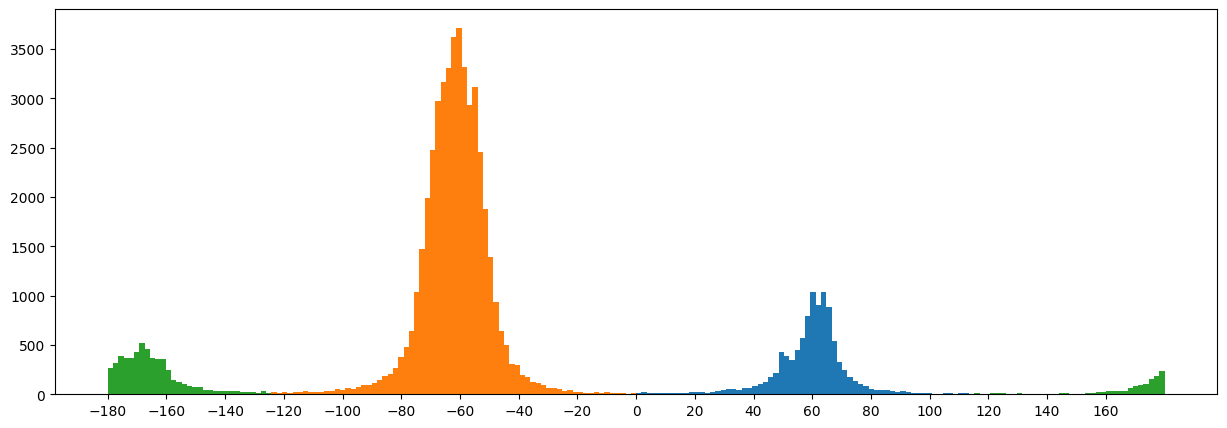

In [14]:
plt.figure(figsize=(15,5))
classes = [get_class(val, rotamers) for val in df["chi_1"]]

for i in np.unique(classes):
    plt.hist(df["chi_1"].values[classes == i], bins=200, range=(-180, 180))

plt.xticks(np.arange(-180, 180, 20))
plt.show()

## Задание 1.4. Теперь мы умеем делить значения $\chi_1$ на классы, т.е. можем понять, к какому ротамеру относится то или иное значение.
Реализуем первую часть подхода Dunbrack. Шаги:
- Разделить карту Рамачандрана на блоки $20 x 20$. Для каждого блока нужно найти те сэмплы из выборки, которые входят в него.
- Для всех найденных сэмплов нужно получить индексы классов; после этого выбрать класс, встречающийся чаще всего, и сохранить его в соответствующую ячейку матрицы **most_common_rotamers**.
    - Если получилось меньше 10 значений для некоторого блока, нужно получить наиболее частый класс для всей выборки.

In [15]:
all_rots = [get_class(val, rotamers) for val in df["chi_1"]]
all_un_rots, all_un_cnts = np.unique(all_rots, return_counts=True)

most_common = all_un_rots[np.argmax(all_un_cnts)]

In [16]:
most_common

1

In [17]:
most_common_rotamers = np.full((18, 18), np.nan)
for phi_ind in range(18):
    phi_st = -180 + 20 * phi_ind
    phi_end = -180 + 20 * (phi_ind + 1)
    for psi_ind in range(18):
        psi_st = -180 + 20 * psi_ind
        psi_end = -180 + 20 * (psi_ind + 1)
        
        loc_data = df[(df["phi"] >= phi_st) & (df["phi"] < phi_end) & 
                      (df["psi"] >= psi_st) & (df["psi"] < psi_end)]
        if loc_data.shape[0] < 10:
            most_common_rotamers[psi_ind, phi_ind] = most_common
        else:
            loc_rots = [get_class(val, rotamers) 
                        for val in loc_data["chi_1"]]
            loc_un_rots, loc_un_cnts = np.unique(loc_rots, 
                                                 return_counts=True)
            most_common_rotamers[psi_ind, phi_ind] = loc_un_rots[np.argmax(loc_un_cnts)]
            

Отобразите получившуюся матрицу с помощью plt.imshow: 

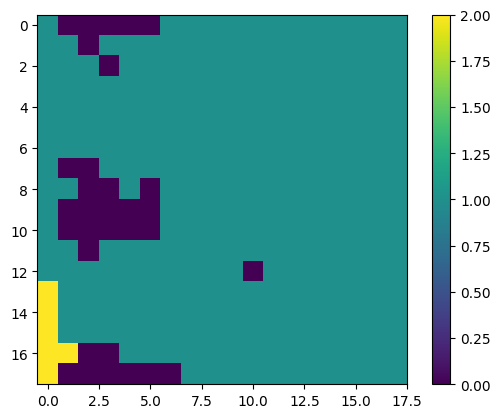

In [18]:
plt.imshow(most_common_rotamers)

plt.colorbar()
plt.show()

Какие выводы можно сделать на основании изображения выше? Можно ли сказать, что какой-то ротамер характерен для определенной вторичной структуры?

# $\rightarrow$ Ваши идеи 🙂

## Задание 1.5. А насколько вообще состоятелен подход к поиску пересечений, основанный на энергии van der Waals?

Давайте возьмем достаточно длинный белок $1Z87$, откроем его и изучим:

In [19]:
!pip install Bio

In [20]:
import Bio.PDB as pdb

In [21]:
path = pdb.PDBList().retrieve_pdb_file("1z87", 
                                       file_format="pdb")
struct = pdb.PDBParser().get_structure("s", path)

Structure exists: '/Users/mac-julia/Documents/proteins_hse/z8/pdb1z87.ent' 


Получите 0-ую цепочку этого белка, найдите в ней индексы всех цистеинов (CYS):

In [22]:
chain = struct[0].child_list[0]
residues = chain.child_list
cys_inds = [i for i in range(len(chain)) 
            if residues[i].resname == "CYS"]

cys_inds

[15, 218, 231]

Выберите первый найденный цистеин. Будем менять для него угол $\chi_1$ и смотреть, как будет меняться энергия ван дер Ваальса при взаимодействии с другими атомами.

$U_{LJ} = 4 \cdot \epsilon \cdot [(\frac{r_{min}}{r})^{12} - 2 \cdot (\frac{r_{min}}{r})^6]$

In [23]:
lj_coeffs = pd.read_csv("lennard-jones_12-6.csv", delimiter="\t")
lj_coeffs.head()

,atom_pair,reqm,eps
0,C-C,4,"0,15"
1,C-N,"3,75","0,155"
2,C-O,"3,6","0,173"
3,C-S,4,"0,173"
4,C-H,3,"0,055"


In [24]:
def van_der_Waals(d, d_m, eps):
    return  4 * eps * (((d_m / d) ** 12) - 2 * ((d_m / d) ** 6))

Изменяя двугранный угол в пределах $[-\pi, \pi)$:
- Вычислите новые координаты атома SG у цистеина. Для этого можно воспользоваться функциями из файла geometry.py (из первого ДЗ).
- После получения координат, их можно присвоить с помощью метода:

    residue["CG"].set_coord(new_cg1_coord)
- После этого вычислите суммарную энергию ван дер Ваальса взаимодействия со всеми другими атомами белка.

In [25]:
from geometry import *

Для удобства сделаем словарь из таблицы с коэффициентами потенциала типа Леннарда-Джонса:

In [26]:
lj_coeffs = {row[0]: {"d_min": float(row[1].replace(",", ".")), 
                      "eps": float(row[2].replace(",", "."))} for row in lj_coeffs.values}
lj_coeffs

{'C-C': {'d_min': 4.0, 'eps': 0.15},
 'C-N': {'d_min': 3.75, 'eps': 0.155},
 'C-O': {'d_min': 3.6, 'eps': 0.173},
 'C-S': {'d_min': 4.0, 'eps': 0.173},
 'C-H': {'d_min': 3.0, 'eps': 0.055},
 'N-C': {'d_min': 3.75, 'eps': 0.155},
 'N-N': {'d_min': 3.5, 'eps': 0.16},
 'N-O': {'d_min': 3.35, 'eps': 0.179},
 'N-S': {'d_min': 3.75, 'eps': 0.179},
 'N-H': {'d_min': 2.75, 'eps': 0.057},
 'O-C': {'d_min': 3.6, 'eps': 0.173},
 'O-N': {'d_min': 3.35, 'eps': 0.179},
 'O-O': {'d_min': 3.2, 'eps': 0.2},
 'O-S': {'d_min': 3.6, 'eps': 0.2},
 'O-H': {'d_min': 2.6, 'eps': 0.063},
 'S-C': {'d_min': 4.0, 'eps': 0.173},
 'S-N': {'d_min': 3.75, 'eps': 0.179},
 'S-O': {'d_min': 3.6, 'eps': 0.2},
 'S-S': {'d_min': 4.0, 'eps': 0.2},
 'S-H': {'d_min': 3.0, 'eps': 0.063},
 'H-C': {'d_min': 3.0, 'eps': 0.055},
 'H-N': {'d_min': 2.75, 'eps': 0.057},
 'H-O': {'d_min': 2.6, 'eps': 0.063},
 'H-S': {'d_min': 3.0, 'eps': 0.063},
 'H-H': {'d_min': 2.0, 'eps': 0.02}}

In [27]:
def calc_vdw_w_residue(ref_residue, residue):
    ref_atoms = [at 
                 for at in ref_residue.child_list 
                 if at not in ["C", "N", "CA", "CB", "O"] and at.element[0] != "H"]
    atoms = [at 
             for at in residue.child_list 
             if at.element[0] != "H"]
    
    ds, d_ms, epses = [], [], []
    for at1 in ref_atoms:
        for at2 in atoms:
            pair = "{}-{}".format(at1.element, at2.element)
            ds += [at1 - at2]
            d_ms += [lj_coeffs[pair]["d_min"]]
            epses += [lj_coeffs[pair]["eps"]]
            
    ds =    np.array(ds)
    d_ms =  np.array(d_ms)
    epses = np.array(epses)
    
    return van_der_Waals(ds, d_ms, epses).sum()
    

In [28]:
calc_vdw_w_residue(chain[2], chain[3])

157461.58689638547

In [29]:
chi1_vals = np.arange(-np.pi, np.pi, np.pi/10)

cys_residue = residues[cys_inds[0]]

chi1_true = pdb.calc_dihedral(cys_residue["N"].get_vector(),
                              cys_residue["CA"].get_vector(),
                              cys_residue["CB"].get_vector(),
                              cys_residue["SG"].get_vector(),                             
                             )
planar = pdb.calc_angle(cys_residue["CA"].get_vector(),
                      cys_residue["CB"].get_vector(),
                      cys_residue["SG"].get_vector())
bond = cys_residue["SG"] - cys_residue["CB"]
prev_atoms = np.array([cys_residue["N"].coord, 
                       cys_residue["CA"].coord, 
                       cys_residue["CB"].coord, 
                      ])

vdw_vals = []

for chi1 in chi1_vals:
    new_coord = place_next_dihedral_atom(prev_atoms, chi1, planar, bond)
    cys_residue["SG"].set_coord(new_coord)
    
    vdw_sum = 0
    for k in range(len(residues)):
        if k == cys_inds[0]:
            continue
        
        vdw_sum += calc_vdw_w_residue(cys_residue, residues[k])
    
    vdw_vals += [vdw_sum]

In [30]:
vdw_vals

[316494.9523184497,
 316494.5906475921,
 316494.05579365446,
 316493.3601221159,
 316492.64517937024,
 316492.16385490814,
 316492.78472152667,
 316494.6289854579,
 316498.8750134774,
 316528.64588691585,
 316674.7817079582,
 316866.37963295047,
 316733.978590917,
 316602.96995294496,
 316560.22929702845,
 316511.48357548914,
 316493.0136240393,
 316491.72926440986,
 316493.6624564071,
 316494.86535087216]

In [31]:
chi1_vals

array([-3.14159265, -2.82743339, -2.51327412, -2.19911486, -1.88495559,
       -1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
        0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
        1.57079633,  1.88495559,  2.19911486,  2.51327412,  2.82743339])

Постройте график для получившихся значений энергии. Какой вывод можно сделать из него?

In [32]:
chi1_true/np.pi*180

-154.84349620456356

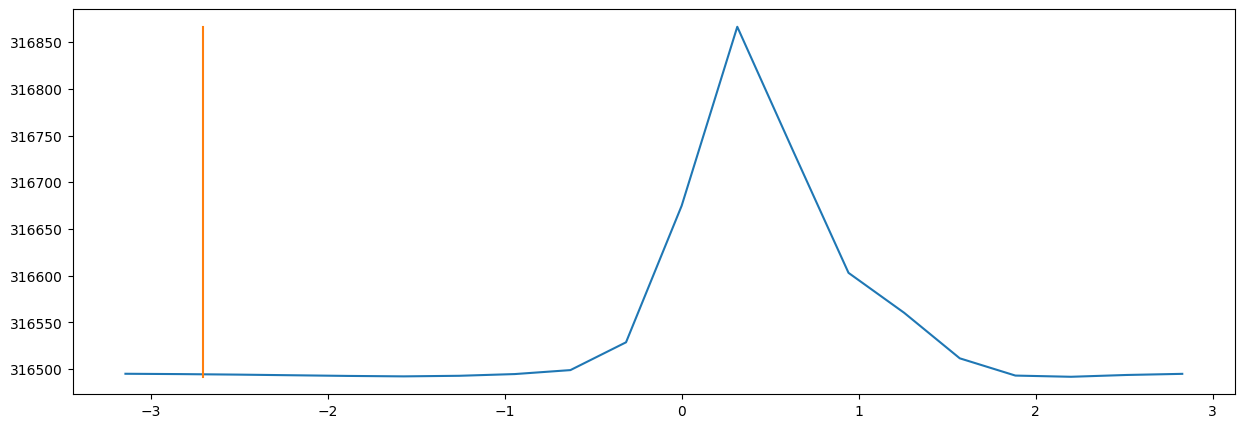

In [33]:
plt.figure(figsize=(15,5))
plt.plot(chi1_vals, vdw_vals)
plt.plot([chi1_true, chi1_true], [min(vdw_vals), max(vdw_vals)])
plt.show()

Вполнне состоятельно оценивать пересечение групп атомов при большом значении Ван-дервальса

# Часть 2. Предсказание ротамеров $\chi_1$

В этой части Вам предстоит применить методы Машинного Обучения (деревья решений) к задаче предсказания ротамеров Вашей аминокислоты.

## Задание 2.1. Вернемся к датасету из части 1. Добавьте колонку chi_class, которая получается преобразованием значений из колонки chi_1 к классам.

In [34]:
# изменение угла (x+ pi)//(2*pi/18)

In [35]:
from math import pi

In [36]:
t = []
for i in df["chi_1"]:
    t.append((i+pi)//(2*pi/18))

In [37]:
t

[-488.0,
 -476.0,
 -158.0,
 -308.0,
 -144.0,
 -156.0,
 162.0,
 -198.0,
 -135.0,
 -164.0,
 185.0,
 -125.0,
 -259.0,
 151.0,
 91.0,
 -170.0,
 -501.0,
 -132.0,
 65.0,
 90.0,
 -195.0,
 -180.0,
 -429.0,
 210.0,
 -142.0,
 -161.0,
 -148.0,
 -180.0,
 -151.0,
 -181.0,
 -133.0,
 -172.0,
 -171.0,
 -204.0,
 -156.0,
 -494.0,
 -477.0,
 -189.0,
 -175.0,
 -469.0,
 -149.0,
 -181.0,
 -155.0,
 -191.0,
 -175.0,
 -179.0,
 -185.0,
 -198.0,
 -190.0,
 -154.0,
 -127.0,
 -215.0,
 -207.0,
 -193.0,
 -196.0,
 205.0,
 -126.0,
 -164.0,
 -452.0,
 253.0,
 515.0,
 -167.0,
 -158.0,
 -160.0,
 173.0,
 -492.0,
 -170.0,
 -179.0,
 -158.0,
 -201.0,
 -180.0,
 -458.0,
 -150.0,
 -165.0,
 -133.0,
 -357.0,
 -206.0,
 -148.0,
 -184.0,
 -145.0,
 -145.0,
 -484.0,
 -172.0,
 -176.0,
 204.0,
 -165.0,
 -127.0,
 -186.0,
 191.0,
 -152.0,
 -133.0,
 -151.0,
 517.0,
 -140.0,
 -177.0,
 189.0,
 213.0,
 -181.0,
 -173.0,
 -211.0,
 -452.0,
 -221.0,
 -183.0,
 -468.0,
 -213.0,
 227.0,
 224.0,
 185.0,
 -190.0,
 -495.0,
 -446.0,
 -158.0,
 -244.0,
 267.

In [38]:
df['chi_class'] = t

## Задание 2.2. Теперь давайте дискретизируем значения $\phi, \psi, \alpha$. Каждому значению из $[-\pi, \pi]$ нужно поставить в соответствие номер блока длиной 20 градусов, в который он попадает.

**Комментарий**: обратите внимание, значения могут быть отрицательными. А номер блока нет 🤔

In [39]:
# всего 18 классов

In [40]:
block = []
for i in t:
    if i%20 == 0:
        block.append(abs(i//20))
    else:
        block.append(abs(i//20+i%20))
block

[13.0,
 20.0,
 6.0,
 4.0,
 8.0,
 4.0,
 10.0,
 8.0,
 2.0,
 7.0,
 14.0,
 8.0,
 12.0,
 18.0,
 15.0,
 1.0,
 7.0,
 1.0,
 8.0,
 14.0,
 5.0,
 9.0,
 11.0,
 20.0,
 10.0,
 10.0,
 4.0,
 9.0,
 1.0,
 9.0,
 0.0,
 1.0,
 0.0,
 5.0,
 4.0,
 19.0,
 21.0,
 1.0,
 4.0,
 13.0,
 3.0,
 9.0,
 3.0,
 1.0,
 4.0,
 8.0,
 5.0,
 8.0,
 0.0,
 2.0,
 6.0,
 6.0,
 2.0,
 3.0,
 6.0,
 15.0,
 7.0,
 7.0,
 15.0,
 25.0,
 40.0,
 4.0,
 6.0,
 8.0,
 21.0,
 17.0,
 1.0,
 8.0,
 6.0,
 8.0,
 9.0,
 21.0,
 2.0,
 6.0,
 0.0,
 15.0,
 3.0,
 4.0,
 6.0,
 7.0,
 7.0,
 9.0,
 1.0,
 5.0,
 14.0,
 6.0,
 6.0,
 4.0,
 20.0,
 0.0,
 0.0,
 1.0,
 42.0,
 7.0,
 6.0,
 18.0,
 23.0,
 9.0,
 2.0,
 2.0,
 15.0,
 7.0,
 7.0,
 12.0,
 4.0,
 18.0,
 15.0,
 14.0,
 0.0,
 20.0,
 9.0,
 6.0,
 3.0,
 20.0,
 25.0,
 0.0,
 4.0,
 3.0,
 4.0,
 2.0,
 2.0,
 8.0,
 9.0,
 1.0,
 2.0,
 5.0,
 2.0,
 6.0,
 25.0,
 5.0,
 3.0,
 8.0,
 8.0,
 0.0,
 5.0,
 10.0,
 8.0,
 4.0,
 21.0,
 4.0,
 16.0,
 2.0,
 11.0,
 8.0,
 15.0,
 1.0,
 0.0,
 7.0,
 2.0,
 1.0,
 4.0,
 1.0,
 12.0,
 14.0,
 6.0,
 25.0,
 4.0,
 5.0,
 3.0,
 

In [41]:
df['block'] = block

## Задание 2.3. В датасете есть текстовые признаки! Так как они категориальные, их значения можно поменять на натуральные числа. Пронумеруйте все уникальные значения таких признаков и измените текстовые значения на соответствующие номера. 

In [42]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,5X1X,-121.353153,126.716381,124.146485,-144.929397,78,51,E,0,-85.049371,...,142.713770,98.575763,128.941322,45.503916,56.835975,68.407924,172.074909,94.987919,-235.0,7.0
63042,5X1X,-100.731831,101.492657,110.033866,143.276514,101,28,-,0,-71.525675,...,132.837890,66.013573,42.864891,97.835056,127.403928,42.556767,80.423456,132.556159,-196.0,6.0
63043,5X1X,-73.092971,-30.659857,91.436514,42.510484,106,23,T,0,-56.233248,...,125.127891,83.346626,71.770644,172.688151,93.315752,86.056729,30.563075,100.715354,-153.0,1.0
63044,5X1X,-46.594126,-55.146881,91.555714,40.063601,119,10,H,0,-89.346228,...,105.615707,116.902444,59.775282,18.430398,82.098894,54.403891,50.741328,40.997152,-247.0,0.0


In [43]:
df_copy = df.copy()

In [44]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


### найдем колонки с нечисленными значениями

In [47]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
not_num_col = list(set(df.columns.tolist()) - set(num_col))
not_num_col = sorted(not_num_col)
not_num_col

['n_10_charge_group',
 'n_10_chemical_group',
 'n_10_hydrogen_donor_acceptor_group',
 'n_10_hydropathy_group',
 'n_10_physicochemical_group',
 'n_10_polarity_group',
 'n_10_volume_group',
 'n_11_charge_group',
 'n_11_chemical_group',
 'n_11_hydrogen_donor_acceptor_group',
 'n_11_hydropathy_group',
 'n_11_physicochemical_group',
 'n_11_polarity_group',
 'n_11_volume_group',
 'n_12_charge_group',
 'n_12_chemical_group',
 'n_12_hydrogen_donor_acceptor_group',
 'n_12_hydropathy_group',
 'n_12_physicochemical_group',
 'n_12_polarity_group',
 'n_12_volume_group',
 'n_13_charge_group',
 'n_13_chemical_group',
 'n_13_hydrogen_donor_acceptor_group',
 'n_13_hydropathy_group',
 'n_13_physicochemical_group',
 'n_13_polarity_group',
 'n_13_volume_group',
 'n_14_charge_group',
 'n_14_chemical_group',
 'n_14_hydrogen_donor_acceptor_group',
 'n_14_hydropathy_group',
 'n_14_physicochemical_group',
 'n_14_polarity_group',
 'n_14_volume_group',
 'n_15_charge_group',
 'n_15_chemical_group',
 'n_15_hydroge

In [48]:
len(not_num_col)

138

In [49]:
df.applymap(lambda x: isinstance(x, (int, float))) # we need false

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63041,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63042,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63043,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
63044,False,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


In [50]:
from random import seed
from random import random
import time
seed(1)

### выберем все униклаьные значения в нужных колонках

In [51]:
#chose unique values from dataframe not int of float type
cur = set()
for i in not_num_col:
    cur_ = set(df[i])
    cur = cur.union(cur_)  

In [52]:
len(cur)

6109

In [53]:
dict_uniq = {}
for i in cur:
    dict_uniq[i] = len(dict_uniq)
dict_uniq

{nan: 0,
 '4HV2': 1,
 '2FO8': 2,
 '3T1P': 3,
 '2RQM': 4,
 '3E3V': 5,
 '1GD5': 6,
 '4V38': 7,
 '2AYA': 8,
 '6ISA': 9,
 '1ROA': 10,
 '1LHK': 11,
 '1IJB': 12,
 '5OOU': 13,
 '3FI1': 14,
 '4Q4G': 15,
 '2DKU': 16,
 '5TGW': 17,
 '2L6K': 18,
 '5P7H': 19,
 '1ISE': 20,
 '1V6F': 21,
 '2LHM': 22,
 '1KXD': 23,
 '5JDD': 24,
 '5P48': 25,
 '5P73': 26,
 '2ND4': 27,
 '4AXZ': 28,
 '1P1D': 29,
 '5P5Q': 30,
 '2H14': 31,
 '5P7B': 32,
 '4BE8': 33,
 '2NDJ': 34,
 '2R2Y': 35,
 '2N05': 36,
 '1YHP': 37,
 '1IOQ': 38,
 '2MD5': 39,
 '1CIY': 40,
 '2CQ1': 41,
 '1BBN': 42,
 '2UUT': 43,
 '3T3K': 44,
 '5IEJ': 45,
 '2M2T': 46,
 '4YHR': 47,
 '5P2B': 48,
 '2L28': 49,
 '2M1W': 50,
 '2JN9': 51,
 '1XPW': 52,
 '2K3P': 53,
 '2KXI': 54,
 '1L17': 55,
 '2KD7': 56,
 '2MV2': 57,
 '2F0P': 58,
 '5VO7': 59,
 '1XZF': 60,
 '2E4J': 61,
 '2CZN': 62,
 '5YRY': 63,
 '2KKI': 64,
 '1FAA': 65,
 '1PJB': 66,
 '1BWZ': 67,
 '2K49': 68,
 '2LAO': 69,
 '1C25': 70,
 '1EIE': 71,
 '1FNF': 72,
 '5E0C': 73,
 '3D2A': 74,
 '1QTR': 75,
 '2KKC': 76,
 '5P13': 77,

In [54]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2BO5,-132.673875,143.415464,131.682519,132.908004,10,109,-,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2BO5,-58.525876,-46.093168,91.839903,39.513266,13,106,H,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2BO5,-65.144927,-32.202032,89.886732,49.391530,44,75,H,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2BO5,-67.271147,-49.556771,94.279261,38.174192,85,34,H,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2BO5,-67.401125,-38.312026,91.813249,57.449097,101,18,H,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


In [55]:
type('H')==str

True

### теперь заменим все на сгенерированные числовые значения

In [56]:
%%time
for i in not_num_col:
    print(i)
    start_time = time.time()
    for j in (df[i].unique()):
        print(j)
        if type(j)==str:
            df = df.replace(to_replace = j, value = dict_uniq[j])
    end_time = time.time()
       # df.replace(dict_uniq)
    print(' for {} all values are replaced and it took {}'.format(i,end_time-start_time))

n_10_charge_group
-CHARGED
UNCHARGED
+CHARGED
 for n_10_charge_group all values are replaced and it took 1.1602418422698975
n_10_chemical_group
ACIDIC
HYDROXYL
ALIPHATIC
BASIC
AROMATIC
SULFUR
AMIDE
 for n_10_chemical_group all values are replaced and it took 2.083099126815796
n_10_hydrogen_donor_acceptor_group
ACCEPTOR
DONOR-ACCEPTOR
NONE
DONOR
 for n_10_hydrogen_donor_acceptor_group all values are replaced and it took 1.1424601078033447
n_10_hydropathy_group
HYDROPHILIC
NEUTRAL
HYDROPHOBIC
 for n_10_hydropathy_group all values are replaced and it took 0.840965986251831
n_10_physicochemical_group
3142
2227
3421
3731
F
G
137
1431
P
Y
W
 for n_10_physicochemical_group all values are replaced and it took 0.9955739974975586
n_10_polarity_group
POLAR
NONPOLAR
 for n_10_polarity_group all values are replaced and it took 0.4851398468017578
n_10_volume_group
MEDIUM
SMALL
LARGE
VERY_SMALL
VERY_LARGE
 for n_10_volume_group all values are replaced and it took 0.6256067752838135
n_11_charge_group


VAL
GLU
ASP
SER
PRO
ARG
PHE
THR
HIS
MET
GLN
ALA
ILE
ASN
LYS
TRP
CYS
 for n_name_1 all values are replaced and it took 1.212125301361084
n_name_10
2031
6108
1425
4494
5454
1719
4513
4373
4649
2990
5103
6063
625
2856
367
892
798
3959
4006
4869
 for n_name_10 all values are replaced and it took 0.0007090568542480469
n_name_11
5103
4494
367
4373
2856
2990
4006
1719
6063
5454
2031
625
4649
6108
1425
798
892
3959
4869
4513
 for n_name_11 all values are replaced and it took 0.0005078315734863281
n_name_12
367
4494
4006
1719
2031
4649
2856
2990
1425
5103
3959
5454
4373
625
4513
892
798
6108
6063
4869
 for n_name_12 all values are replaced and it took 0.0004911422729492188
n_name_13
5103
4494
1425
2856
4649
4373
2990
6063
5454
892
1719
3959
6108
4006
367
2031
625
4869
798
4513
 for n_name_13 all values are replaced and it took 0.0004830360412597656
n_name_14
6108
6063
2031
4649
1425
5454
5103
4373
4494
892
1719
625
2990
367
4513
798
2856
4006
3959
4869
 for n_name_14 all values are replaced and

2MMN
2MMX
2MNG
2MNH
2MNT
2MOI
2MOL
2MOQ
2MOT
2MOU
2MOX
2MP3
2MP4
2MPB
2MPE
2MPF
2MPH
2MPL
2MPO
2MPV
2MPW
2MQ6
2MQ8
2MQ9
2MQA
2MQB
2MQC
2MQD
2MQE
2MQG
2MR5
2MR6
2MRA
2MRM
2MS8
2MSK
2MSL
2MSV
2MSW
2MSX
1IZZ
1QJ9
3SUL
5KZ9
5KZB
1HH2
1HHL
1HHN
1HIJ
1HIK
1HJD
1HJM
1HJN
1HKF
1HKS
1HKT
1HLW
1HN6
1HPW
1HQ8
1HSW
1HSX
1HUF
1HV0
1HV1
2LGZ
2LHF
2LHS
2LHT
2LI6
2LIE
2LIO
2LIV
2LIZ
2LJ4
2LJ6
2LJ8
2LJA
2LJK
2LJL
2LJP
2LJU
2LK4
2LKC
2LKG
2LKH
2LKT
2LKU
2LKV
2LKY
2LL0
2LLA
2LLE
2LLF
2LLG
2LLL
2LLN
2LLX
2LLY
2LLZ
2LM2
2LM3
2LM4
2LMI
5YI4
5YB9
5MTI
5EB9
5HT1
1KKG
1KKX
1KLO
1KLP
1KLV
1KLX
1KM7
1KMD
1KN3
1KN5
1KNB
1KNG
1KOA
1KOE
4P9N
4PA1
4PBO
2PTD
2PTH
2PWQ
2PY1
2Q2M
2Q2P
6MBH
5ZB6
5ZUQ
1GCU
1LA1
1LNS
1LWB
1N7N
1N7P
1NC5
1NG6
1NGN
1OTM
1PGV
1Q50
1QWK
1RC9
1RN7
1ROA
1E8L
1FMF
1H3Z
1PRY
1QTT
1QTU
1R9H
1R9K
1XTE
1ZHV
2AIV
2BYE
2BYF
2EXN
2GFV
2H2C
2HAQ
2I88
2JS7
2KCK
2KKX
2KKY
2MAO
2MBC
2MJ3
2VPK
2W1R
2WZ9
2X35
2X3M
2X4L
2RVH
4ZPY
1VLS
1VPK
5JDP
5JKP
3S60
3SEB
3SFT
3SGC
3SIH
3SJ8
2MT4
2MT6
2MTB
2MTC
2MTD
2MTF


1CDI
1CDJ
1CDU
1CDY
1CEM
1CEX
1CEY
1CFC
1CFD
1CFE
1CFR
1CHD
1CII
1CJ5
1CK2
1CKV
1CL3
1CLH
1CMO
4GGA
5OYQ
5OYR
5OYS
5OYT
5OYU
5OYV
5OYW
5OYX
5OYY
5OYZ
5OZ0
5OZ1
5OZ2
5OZ3
5OZ4
5OZ5
5OZ6
5OZ7
5OZ8
5OZ9
5OZA
5OZB
5OZC
5OZD
5OZE
5OZF
5OZG
5OZH
5OZI
5OZJ
5OZK
5OZL
5OZM
5OZN
5OZO
5OZP
5OZQ
5OZR
5OZS
5OZT
5OZU
5OZV
5OZW
5OZX
5OZY
5OZZ
5P00
5P01
5P02
5P03
5P04
5P05
5P06
5P07
5P08
5P09
5P0A
5P0B
5P0C
5P0D
5P0E
5P0F
5P0G
5P0H
5P0I
5P0J
5P0K
5P0L
5P0M
5P0N
5P0O
5P0P
5P0Q
5P0R
5P0S
5P0T
5P0U
5P0V
5P0W
5P0X
5P0Y
5P0Z
5P10
5P11
5P12
5P13
5P14
5P15
5P16
5P17
5P18
5P19
5P1A
5P1B
5P1C
5P1D
5P1E
5P1F
5P1G
5P1H
5P1I
5P1J
5P1K
5P1L
5P1M
5P1N
5P1O
5P1P
5P1Q
5P1R
5P1S
5P1T
5P1U
5P1V
5P1W
5P1X
5P1Y
5P1Z
5P20
5P22
5P23
5P24
5P25
5P26
5P27
5P28
5P29
5P2A
5P2B
5P2C
5P2D
5P2E
5P2F
5P2G
5P2H
5P2I
5P2J
5P2K
5P2L
5P2M
5P2N
5P2O
5P2Q
5P2R
5P2S
5P2T
5P2U
5P2V
5P2W
5P2X
5P2Y
5P2Z
5P30
5P31
5P32
5P33
5P34
5P35
5P36
5P37
5P38
5P39
5P3A
5P3B
5P3C
5P3D
5P3E
5P3F
5P3G
5P3H
5P3I
5P3J
5P3K
5P3L
5P3M
5P3N
5P3O
5P3P
5P3Q
5P3R


189L
1AAJ
1ACF
1ALB
1ALD
1APA
1APC
1BIP
1BW3
1BW4
1BWY
1C05
1C06
1CUS
1DUN
1DUP
1EDE
1F3G
1FKR
1FKS
1FKT
1FYC
1GLN
1GNC
1GOB
1HCD
1I1B
1IFC
1IFT
1IRF
1IRG
1L01
1L04
1L05
1L06
1L07
1L08
1L09
1L10
1L12
1L13
1L14
1L15
1L16
1L17
1L18
1L19
1L20
1L21
1L22
1L23
1L24
1L25
1L27
1L28
1L29
1L30
1L31
1L32
1L33
1L34
1L35
1L37
1L38
1L39
1L40
1L41
1L42
1L44
1L45
1L46
1L47
1L49
1L50
1L51
1L52
1L54
1L60
1LAA
1LAV
1LAW
1LHH
1LHI
1LHJ
1LHK
1LHL
1LHM
1LIB
1LYD
1LYO
1LZ1
1LZ4
1LZA
1LZD
1MAJ
1MAK
1MLA
1NOA
1PCP
1PLS
1PRQ
1PMS
1PNZ
1POQ
1POZ
1PQE
1PQN
1PSN
1PSY
1PU3
1PUL
1PUX
1PV3
1PXU
1PZC
1Q27
1Q2U
1Q2Y
1Q2Z
1Q3T
1Q46
1Q48
1Q56
1Q59
1Q5F
5O8O
6A9Y
5HFQ
5HNC
5HNL
5HTJ
5HTN
5HTR
5HTY
5HU2
5HWF
5LG9
2NAM
4GA0
4GCO
4GEI
4GLP
4GQM
4H86
4HJC
4HU3
4I1T
4I1Z
4I20
4I65
4IBN
4ID6
4IJF
4INK
4IP1
4IP6
2LB6
2LBC
2LBO
2LBP
2LBT
2LBW
2LBX
2LC0
2LC1
2LC2
2LC4
2LC6
2LC7
2LC9
2LCA
2LCB
2LCG
2LCH
2LCI
2LCJ
2LCK
2LCU
2LCW
2LD4
2LD6
2LDY
2LE0
2LEA
2LEJ
2LEN
2LEQ
2LEZ
2LF0
2LF2
2LF3
2LF4
2LF6
2LF7
2LF8
2LFB
2LFG
2LFI
2LFJ
2LFT


1G3G
1G5Z
1G7D
1G7E
1G7O
1G84
1G90
1G9E
1G9L
1GA3
1GAK
1GBS
3ZOR
3ZPD
3ZPJ
3ZRE
3ZUA
3ZYE
4A02
4L9R
4LDM
4LEU
2NBM
5O29
5VJ8
5Z8I
5Z8Q
5ZUZ
6APK
6EZW
5IRD
5JMT
5KUL
5KUN
5KUQ
5KUR
5KUS
5KUU
5KUV
5KUW
5KUZ
5KV0
5KV1
5KV2
5KV3
5KV4
5KV5
5KV6
5KV7
1AUZ
1BUZ
2KXI
5KQJ
6DKU
6F2X
5M8A
5M8J
5M8K
5X9B
1RYX
5YM7
5YO4
5YO6
6EOU
6F4C
5X1X
 for pbd_indx all values are replaced and it took 134.05564403533936
sec_structure
-
H
E
S
T
2470
B
I
nan
 for sec_structure all values are replaced and it took 0.16695809364318848
CPU times: user 2min 20s, sys: 1.51 s, total: 2min 21s
Wall time: 2min 22s


In [57]:
len(df['n_10_charge_group'])

62825

In [58]:
np.unique(df['n_10_charge_group'])

array([3098, 3876, 4694])

In [59]:
df.head()

,pbd_indx,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,chi_1,...,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17,chi_class,block
0,2559,-132.673875,143.415464,131.682519,132.908004,10,109,2066.0,0,-173.454724,...,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189,-488.0,13.0
1,2559,-58.525876,-46.093168,91.839903,39.513266,13,106,4818.0,0,-169.000874,...,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747,-476.0,20.0
2,2559,-65.144927,-32.202032,89.886732,49.391530,44,75,4818.0,0,-57.954325,...,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501,-158.0,6.0
3,2559,-67.271147,-49.556771,94.279261,38.174192,85,34,4818.0,0,-110.633803,...,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228,-308.0,4.0
4,2559,-67.401125,-38.312026,91.813249,57.449097,101,18,4818.0,0,-53.128974,...,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644,-144.0,8.0


In [60]:
#check if there are any not numeric columns

In [61]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
not_num_col = list(set(df.columns.tolist()) - set(num_col))
not_num_col

[]

# pre process

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62825 entries, 0 to 63045
Columns: 302 entries, pbd_indx to block
dtypes: float64(162), int64(140)
memory usage: 145.2 MB


In [63]:
df = df.dropna()

pbd_indx
for pbd_indx it took 0.0 seconds
phi
for phi it took 0.0 seconds
psi
for psi it took 0.0 seconds
tau
for tau it took 0.0 seconds
alpha
for alpha it took 0.0 seconds
ind_from_start
for ind_from_start it took 0.0 seconds
ind_from_end
for ind_from_end it took 0.0 seconds
sec_structure
for sec_structure it took 0.0 seconds
is_tail
for is_tail it took 0.0 seconds
CPU times: user 9 s, sys: 9.66 s, total: 18.7 s
Wall time: 7.79 s


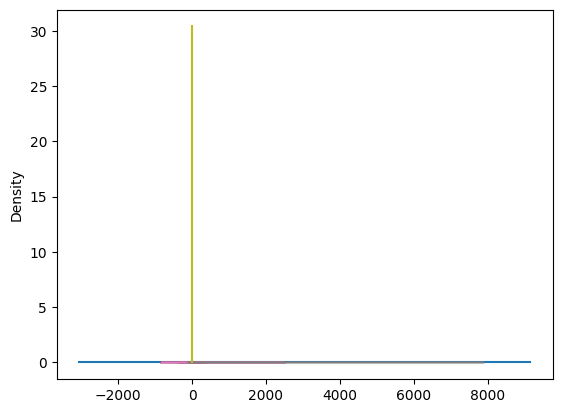

In [235]:
%%time
for i in num_col[0:9]:
    start_time = time.time()
    print(i)
    df[i].plot(kind='kde')
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

In [65]:
import random
number_of_colors = 4

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
         for i in range(number_of_colors)]

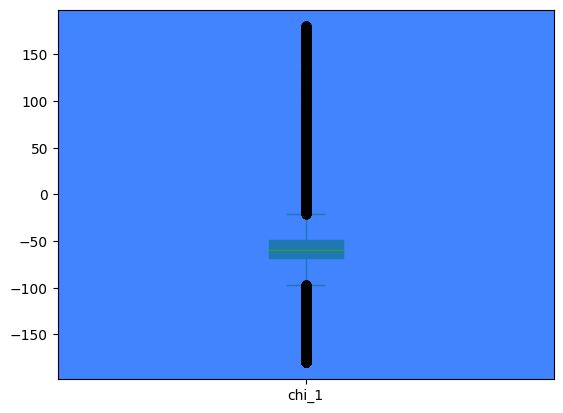

for chi_1 it took 0.0 seconds


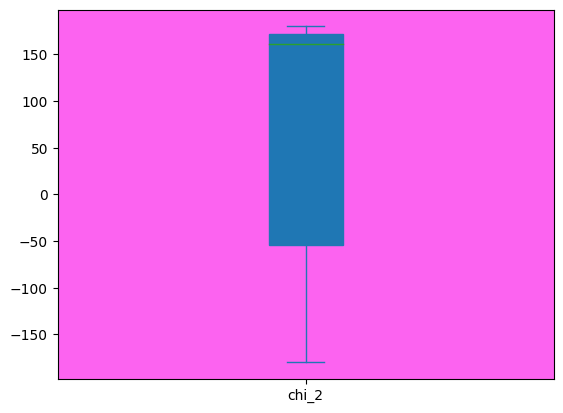

for chi_2 it took 0.0 seconds


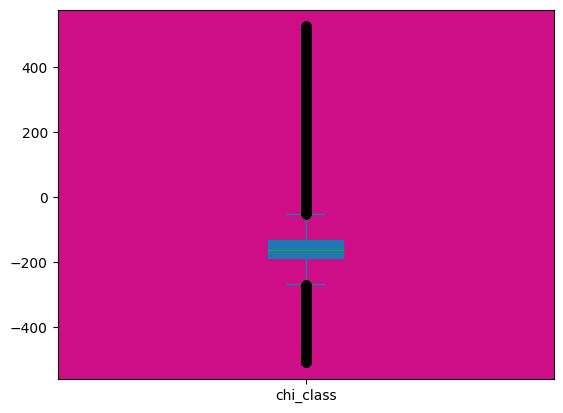

for chi_class it took 0.0 seconds


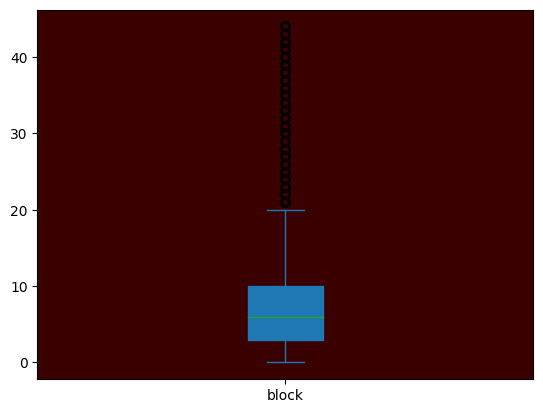

for block it took 0.0 seconds
CPU times: user 568 ms, sys: 291 ms, total: 859 ms
Wall time: 318 ms


In [66]:
%%time
count = 0
for i in ['chi_1', 'chi_2', 'chi_class', 'block']:
    start_time = time.time()
    b = df[i].plot.box(patch_artist=True)
    b.set_facecolor(color[count])
    plt.show()
    count = count + 1
    end_time = start_time = time.time()
    print('for {} it took {} seconds'.format(i,end_time-start_time))

## Задание 2.4. Обучим нашу модель!

Импортируйте библиотеку lightgbm. Если она не установлена, установить ее можно с помощью консольной команды pip:

In [71]:
!pip install xgboost 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.2 MB/s eta 0:00:0000:0100:01


In [72]:
import xgboost as xgb

In [74]:
from sklearn.metrics import * #accuracy_score

Разделите выборку на обучающую и тестовую в соотношении 0.7/0.3. 


В X должны быть все признаки, кроме Unnamed, pdb_id и всех столбцов со значениями углов $\chi$.


y - столбец дискретизированных значений $\chi_1$.

In [75]:
import re

In [76]:
col = df.columns.tolist()
col

['pbd_indx',
 'phi',
 'psi',
 'tau',
 'alpha',
 'ind_from_start',
 'ind_from_end',
 'sec_structure',
 'is_tail',
 'chi_1',
 'chi_2',
 'n_phi_1',
 'n_psi_1',
 'n_phi_2',
 'n_psi_2',
 'n_phi_3',
 'n_psi_3',
 'n_phi_4',
 'n_psi_4',
 'n_phi_5',
 'n_psi_5',
 'n_phi_6',
 'n_psi_6',
 'n_phi_7',
 'n_psi_7',
 'n_phi_8',
 'n_psi_8',
 'n_phi_9',
 'n_psi_9',
 'n_phi_10',
 'n_psi_10',
 'n_phi_11',
 'n_psi_11',
 'n_phi_12',
 'n_psi_12',
 'n_phi_13',
 'n_psi_13',
 'n_phi_14',
 'n_psi_14',
 'n_phi_15',
 'n_psi_15',
 'n_phi_16',
 'n_psi_16',
 'n_phi_17',
 'n_psi_17',
 'n_dist_1',
 'n_name_1',
 'n_dist_2',
 'n_name_2',
 'n_dist_3',
 'n_name_3',
 'n_dist_4',
 'n_name_4',
 'n_dist_5',
 'n_name_5',
 'n_dist_6',
 'n_name_6',
 'n_dist_7',
 'n_name_7',
 'n_dist_8',
 'n_name_8',
 'n_dist_9',
 'n_name_9',
 'n_dist_10',
 'n_name_10',
 'n_dist_11',
 'n_name_11',
 'n_dist_12',
 'n_name_12',
 'n_dist_13',
 'n_name_13',
 'n_dist_14',
 'n_name_14',
 'n_dist_15',
 'n_name_15',
 'n_dist_16',
 'n_name_16',
 'n_dist_17',

In [77]:
p = re.compile('chi*')
newlist = list(filter(p.match, col)) # Read Note below
print(newlist)

['chi_1', 'chi_2', 'chi_class']


In [78]:
df_x = df.loc[:,~df.columns.isin(['chi_1', 'chi_2', 'chi_class', 'block', 'pbd_indx'])]
df_x 

,phi,psi,tau,alpha,ind_from_start,ind_from_end,sec_structure,is_tail,n_phi_1,n_psi_1,...,gamma14,alpha15,beta15,gamma15,alpha16,beta16,gamma16,alpha17,beta17,gamma17
0,-132.673875,143.415464,131.682519,132.908004,10,109,2066.0,0,-148.001357,-67.992231,...,149.497815,41.249609,45.624462,87.362901,35.804617,97.974890,123.708933,43.206417,128.453892,80.477189
1,-58.525876,-46.093168,91.839903,39.513266,13,106,4818.0,0,157.271213,-65.320600,...,70.701617,40.707637,52.906550,59.405290,58.525391,125.539369,66.865025,43.699178,96.296884,52.406747
2,-65.144927,-32.202032,89.886732,49.391530,44,75,4818.0,0,-76.835747,-30.680678,...,53.288917,14.692650,113.218466,75.453066,54.015264,62.254251,70.714861,131.691470,92.295745,47.250501
3,-67.271147,-49.556771,94.279261,38.174192,85,34,4818.0,0,-67.401758,-20.736880,...,143.678835,109.953109,103.997430,31.013922,29.953156,90.677448,67.046059,68.871953,49.519534,64.581228
4,-67.401125,-38.312026,91.813249,57.449097,101,18,4818.0,0,-71.394747,-34.235373,...,82.929903,96.622779,105.015224,55.540807,54.778124,56.230851,144.518962,20.361839,10.698696,85.074644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63039,-90.718425,151.191420,124.120811,-142.810261,62,67,2066.0,0,-44.677966,117.046225,...,128.917690,43.019229,99.163104,86.905148,64.985254,45.746459,135.644169,78.230439,134.452807,88.455779
63040,-167.720376,157.989273,143.444417,-118.363065,68,61,2754.0,0,-81.336043,-63.308252,...,80.763073,93.658211,28.894019,111.397216,60.914892,15.220595,97.316535,78.243328,147.500613,106.775063
63041,-121.353153,126.716381,124.146485,-144.929397,78,51,2754.0,0,118.552928,-153.733059,...,64.907875,38.871942,142.713770,98.575763,128.941322,45.503916,56.835975,68.407924,172.074909,94.987919
63042,-100.731831,101.492657,110.033866,143.276514,101,28,2066.0,0,176.937992,-176.145006,...,76.902411,63.606574,132.837890,66.013573,42.864891,97.835056,127.403928,42.556767,80.423456,132.556159


In [79]:
X = df_x.values
y = df.loc[:,df.columns.isin(['block'])].values

In [80]:
X

array([[-132.67387498,  143.41546352,  131.68251908, ...,   43.20641748,
         128.4538924 ,   80.47718884],
       [ -58.52587571,  -46.0931677 ,   91.83990305, ...,   43.69917806,
          96.29688367,   52.40674718],
       [ -65.1449267 ,  -32.20203155,   89.88673175, ...,  131.69147037,
          92.2957452 ,   47.25050077],
       ...,
       [-121.35315283,  126.71638083,  124.14648508, ...,   68.40792356,
         172.07490919,   94.9879189 ],
       [-100.73183051,  101.49265736,  110.03386606, ...,   42.55676745,
          80.42345574,  132.55615866],
       [ -46.59412619,  -55.14688138,   91.5557145 , ...,   54.40389108,
          50.74132849,   40.99715181]])

In [81]:
y

array([[13.],
       [20.],
       [ 6.],
       ...,
       [ 7.],
       [ 6.],
       [ 0.]])

In [84]:
X = np.delete(X, 1, axis=1)
# X_== X
X

array([[-132.67387498,  132.90800425,   10.        , ...,   43.20641748,
         128.4538924 ,   80.47718884],
       [ -58.52587571,   39.51326581,   13.        , ...,   43.69917806,
          96.29688367,   52.40674718],
       [ -65.1449267 ,   49.3915298 ,   44.        , ...,  131.69147037,
          92.2957452 ,   47.25050077],
       ...,
       [-121.35315283, -144.92939665,   78.        , ...,   68.40792356,
         172.07490919,   94.9879189 ],
       [-100.73183051,  143.27651401,  101.        , ...,   42.55676745,
          80.42345574,  132.55615866],
       [ -46.59412619,   40.06360094,  119.        , ...,   54.40389108,
          50.74132849,   40.99715181]])

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
from sklearn import tree

# DecisionTreeClassifier №1

In [87]:
%%time
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

CPU times: user 27.2 s, sys: 115 ms, total: 27.4 s
Wall time: 27.4 s


In [88]:
%%time
y_pred = clf.predict(X_test)

CPU times: user 16.9 ms, sys: 11.5 ms, total: 28.4 ms
Wall time: 27.6 ms


In [89]:
# %%time
# tree.plot_tree(clf) 

CPU times: user 44.8 s, sys: 3.4 s, total: 48.2 s
Wall time: 48.3 s


[Text(0.8700051259970838, 0.9910714285714286, 'X[245] <= 127.427\ngini = 0.942\nsamples = 42490\nvalue = [1617, 3221, 3211, 3339, 3327, 3421, 3393, 3399, 3084\n2522, 1688, 1052, 695, 622, 570, 520, 517, 543, 562\n602, 558, 548, 528, 499, 429, 370, 404, 363, 199\n84, 69, 40, 38, 44, 33, 36, 41, 41, 39, 43, 28\n46, 49, 32, 24]'),
 Text(0.7637803634723908, 0.9732142857142857, 'X[248] <= 130.294\ngini = 0.938\nsamples = 39118\nvalue = [1572, 3096, 3101, 3226, 3214, 3291, 3272, 3254, 2940\n2405, 1553, 921, 568, 485, 463, 406, 421, 419, 420\n430, 420, 436, 422, 387, 344, 283, 318, 283, 151\n67, 66, 36, 37, 38, 30, 35, 36, 37, 34, 41, 25\n39, 44, 31, 21]'),
 Text(0.6241634189636925, 0.9553571428571429, 'X[44] <= 5.273\ngini = 0.934\nsamples = 36804\nvalue = [1544, 3038, 3049, 3180, 3126, 3220, 3206, 3165, 2852\n2296, 1430, 814, 487, 385, 381, 308, 323, 321, 330\n353, 334, 347, 349, 320, 280, 230, 254, 227, 112\n55, 58, 31, 31, 33, 30, 32, 30, 33, 28, 39, 24\n32, 42, 26, 19]'),
 Text(0.5104038

Error in callback <function _draw_all_if_interactive at 0x7f7ee851f820> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f7ee873d790> (for post_execute):


KeyboardInterrupt: 

In [90]:
from sklearn import metrics

In [91]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))

accuracy_score:  0.07462522651144912
CPU times: user 6.98 ms, sys: 5.6 ms, total: 12.6 ms
Wall time: 17 ms


In [92]:
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

balanced_accuracy_score:  0.03700988226020159
f1_score:  0.07504231617385716
precision_score:  0.0755500420724313


In [ ]:
#print('log_loss: ',metrics.log_loss(y_pred, y_test))
# print('top_k_accuracy_score: ',metrics.top_k_accuracy_score(y_pred, y_test))
# print('average_precision_score: ',metrics.average_precision_score(y_pred, y_test))
# print('brier_score_loss: ',metrics.brier_score_loss(y_pred, y_test))
#print('roc_auc_score: ',metrics.roc_auc_score(y_pred, y_test,average='weighted'))

In [ ]:
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))

# DecisionTreeClassifier №2

In [93]:
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier

In [94]:
%%time
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)

CPU times: user 2.46 s, sys: 72 ms, total: 2.53 s
Wall time: 2.57 s


In [95]:
%%time
y_pred = decision_tree.predict(X_test)

CPU times: user 15.1 ms, sys: 41.8 ms, total: 56.9 ms
Wall time: 92.5 ms


In [96]:
%%time
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

balanced_accuracy_score:  0.0791582298740618
f1_score:  0.14469356344250903
precision_score:  0.8287725164297619
CPU times: user 51.1 ms, sys: 4.53 ms, total: 55.6 ms
Wall time: 57.8 ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))

# xgb

In [102]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

In [112]:
%%time
model = xgb.XGBClassifier(tree_method ="hist",max_depth=2)

CPU times: user 470 µs, sys: 574 µs, total: 1.04 ms
Wall time: 1.29 ms


In [113]:
%%time
model.fit(X_train, y_train)

CPU times: user 3min 23s, sys: 26.6 s, total: 3min 50s
Wall time: 52 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [105]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [114]:
%%time
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

CPU times: user 1.19 s, sys: 93.9 ms, total: 1.28 s
Wall time: 195 ms


In [115]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

balanced_accuracy_score:  0.056025345367070746
f1_score:  0.1018310991959487
precision_score:  0.12221845236315744
CPU times: user 50.6 ms, sys: 5.03 ms, total: 55.7 ms
Wall time: 53.6 ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [119]:
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))

accuracy_score:  0.09159299324584043


In [236]:
param_dist = {"max_depth": [2,10],
              "min_child_weight" : [1,3],
              "n_estimators": [10],
              "learning_rate": [0.05, 0.1],}

In [237]:
%%time
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

grid_search.best_estimator_


Fitting 3 folds for each of 8 candidates, totalling 24 fits
accuracy_score:  0.09159299324584043
balanced_accuracy_score:  0.056025345367070746
f1_score:  0.1018310991959487
precision_score:  0.12221845236315744
CPU times: user 24 s, sys: 4.16 s, total: 28.1 s
Wall time: 3min 35s


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [240]:
a = grid_search.best_estimator_
a.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [241]:
y_pred = a.predict(X_test)

In [242]:
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.08747460326176487
balanced_accuracy_score:  0.08630550501035068
f1_score:  0.10929286546859818
precision_score:  0.20118727887853802


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


[CV 3/3; 2/8] START learning_rate=0.05, max_depth=2, min_child_weight=3, n_estimators=10
[CV 3/3; 2/8] END learning_rate=0.05, max_depth=2, min_child_weight=3, n_estimators=10;, score=0.086 total time=  23.6s
[CV 3/3; 4/8] START learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=10
[CV 3/3; 4/8] END learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=10;, score=0.087 total time= 1.7min
[CV 2/3; 2/8] START learning_rate=0.05, max_depth=2, min_child_weight=3, n_estimators=10
[CV 2/3; 2/8] END learning_rate=0.05, max_depth=2, min_child_weight=3, n_estimators=10;, score=0.091 total time=  23.9s
[CV 1/3; 5/8] START learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=10
[CV 1/3; 5/8] END learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=10;, score=0.090 total time=  30.8s
[CV 1/3; 6/8] START learning_rate=0.1, max_depth=2, min_child_weight=3, n_estimators=10
[CV 1/3; 6/8] END learning_rate=0.1, max_depth=2, min_child_weight=3, n_esti

In [ ]:
# model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
#                           n_jobs=-1 , verbose=1,learning_rate=0.16)
# model.fit(train,y_train)

# print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
# print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
# print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
# print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

Обучите модель, проверьте качество обучения на тестовой выборке (по метрике accuracy). Получилось ли хорошая модель?

# catboost

In [123]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 5.6 MB/s eta 0:00:0000:0100:01


In [145]:
import catboost as cb
#cat_features_index = [0,1,2,3,4,5,6]
train = X_train

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [146]:
params = {'depth': [2],
          'learning_rate' : [0.03],
         'l2_leaf_reg': [1],
         'iterations': [10]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

0:	learn: 3.7592774	total: 205ms	remaining: 1.84s
1:	learn: 3.7165345	total: 498ms	remaining: 1.99s
2:	learn: 3.6758970	total: 749ms	remaining: 1.75s
3:	learn: 3.6406150	total: 983ms	remaining: 1.47s
4:	learn: 3.6083582	total: 1.31s	remaining: 1.31s
5:	learn: 3.5786318	total: 1.67s	remaining: 1.11s
6:	learn: 3.5514281	total: 1.99s	remaining: 851ms
7:	learn: 3.5261267	total: 2.3s	remaining: 575ms
8:	learn: 3.5027004	total: 2.59s	remaining: 288ms
9:	learn: 3.4808785	total: 2.89s	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 3.7593126	total: 163ms	remaining: 1.47s
1:	learn: 3.7166303	total: 358ms	remaining: 1.43s
2:	learn: 3.6757610	total: 579ms	remaining: 1.35s
3:	learn: 3.6404818	total: 801ms	remaining: 1.2s
4:	learn: 3.6081968	total: 1.12s	remaining: 1.12s
5:	learn: 3.5783944	total: 1.42s	remaining: 949ms
6:	learn: 3.5511567	total: 1.67s	remaining: 718ms
7:	learn: 3.5258416	total: 1.91s	remaining: 479ms
8:	learn: 3.5024329	total: 2.17s	remaining: 241ms
9:	learn: 3.4805404	total: 2.43s	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(


0:	learn: 3.7592413	total: 161ms	remaining: 1.45s
1:	learn: 3.7166477	total: 349ms	remaining: 1.4s
2:	learn: 3.6757027	total: 509ms	remaining: 1.19s
3:	learn: 3.6403728	total: 659ms	remaining: 989ms
4:	learn: 3.6081273	total: 875ms	remaining: 875ms
5:	learn: 3.5785062	total: 1.09s	remaining: 726ms
6:	learn: 3.5512267	total: 1.31s	remaining: 564ms
7:	learn: 3.5259681	total: 1.57s	remaining: 393ms
8:	learn: 3.5025377	total: 1.86s	remaining: 207ms
9:	learn: 3.4806063	total: 2.15s	remaining: 0us


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 349, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.wa

0:	learn: 3.7592333	total: 236ms	remaining: 2.12s
1:	learn: 3.7165068	total: 505ms	remaining: 2.02s
2:	learn: 3.6756799	total: 711ms	remaining: 1.66s
3:	learn: 3.6403816	total: 917ms	remaining: 1.37s
4:	learn: 3.6081104	total: 1.19s	remaining: 1.19s
5:	learn: 3.5783714	total: 1.48s	remaining: 985ms
6:	learn: 3.5508877	total: 1.75s	remaining: 752ms
7:	learn: 3.5256113	total: 2.09s	remaining: 523ms
8:	learn: 3.5022049	total: 2.5s	remaining: 278ms
9:	learn: 3.4803099	total: 2.95s	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f7f39157fa0>,
             param_grid={'depth': [2], 'iterations': [10], 'l2_leaf_reg': [1],
                         'learning_rate': [0.03]},
             scoring='roc_auc')

In [148]:
%%time
print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

accuracy_score:  0.09159299324584043
balanced_accuracy_score:  0.056025345367070746
f1_score:  0.1018310991959487
precision_score:  0.12221845236315744
CPU times: user 46.2 ms, sys: 5.89 ms, total: 52.1 ms
Wall time: 50.7 ms


/Users/mac-julia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


# Это лучший результат, и хотя все метрики довольно низкие - работа была проделана внушительная

In [ ]:
# %%time
# clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
# clf.fit(train,y_train)
# auc(clf, train, test)


In [ ]:
# %%time
# print('accuracy_score: ',metrics.accuracy_score(y_pred, y_test))
# print('balanced_accuracy_score: ',metrics.balanced_accuracy_score(y_pred, y_test))
# print('f1_score: ',metrics.f1_score(y_pred, y_test,average='weighted'))
# print('precision_score: ',metrics.precision_score(y_pred, y_test,average='weighted'))

вывод насколько это хороший скор?
Построить рок аук и како-то доп вывод или анализ на доп баллы, или покрутить коэффициенты